# Assignment 2
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [233]:
# Installing Libraries
# !pip install scikit-learn matplotlib Pillow

In [234]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [235]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

### Load Dataset

In [236]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [237]:
# Loading the dataset
# eg.
dirpath1 = './dataset/IIIT-CFW/'
dirpath2 = './dataset/IMFDB/'
dirpath3 = './dataset/Yale_face_database/'

X_IIIT,y_IIIT = load_data(dirpath1)
X_IMFDB,y_IMFDB = load_data(dirpath2)
X_YALE,y_YALE = load_data(dirpath3)

N_IIIT,H_IIIT,W_IIIT = X_IIIT.shape[0:3]
N_IMFDB,H_IMFDB,W_IMFDB = X_IMFDB.shape[0:3]
N_YALE,H_YALE,W_YALE = X_YALE.shape[0:3]

C_IIIT = 1 if opt['is_grayscale'] else X_IIIT.shape[3]
C_IMFDB = 1 if opt['is_grayscale'] else X_IMFDB.shape[3]
C_YALE = 1 if opt['is_grayscale'] else X_YALE.shape[3]

X = X_IMFDB
y = y_IMFDB
N,H,W = N_IMFDB,H_IMFDB,W_IMFDB
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (672, 32, 32, 3)
Dataset shape: (400, 32, 32, 3)
Dataset shape: (165, 32, 32, 3)


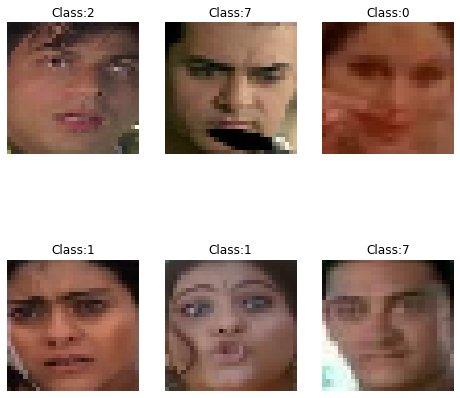

In [238]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

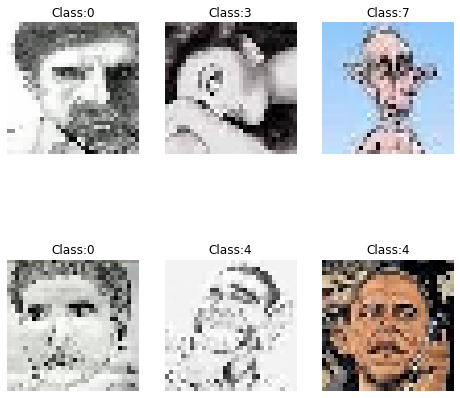

In [239]:
# Show sample images
ind = np.random.randint(0,y_IIIT.shape[0],6)
disply_images(X_IIIT[ind,...],y_IIIT[ind], row=2,col=3)

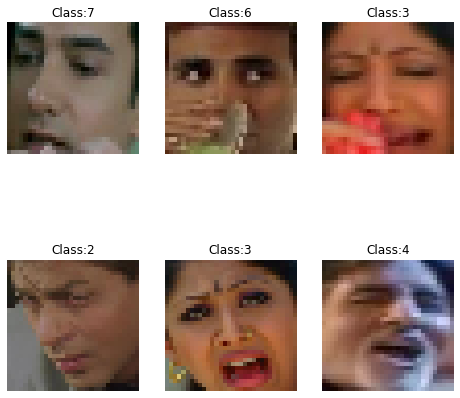

In [240]:
# Show sample images
ind = np.random.randint(0,y_IMFDB.shape[0],6)
disply_images(X_IMFDB[ind,...],y_IMFDB[ind], row=2,col=3)

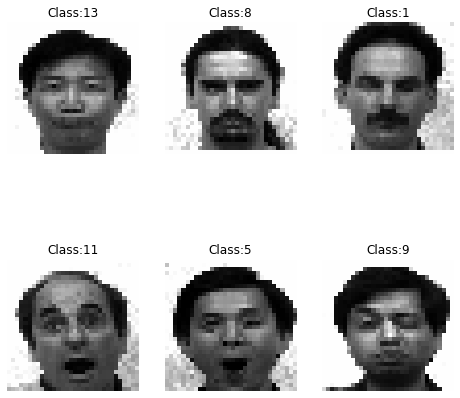

In [241]:
# Show sample images
ind = np.random.randint(0,y_YALE.shape[0],6)
disply_images(X_YALE[ind,...],y_YALE[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [242]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

In [243]:
# Flatten to apply PCA/LDA
X_IIIT = X_IIIT.reshape((N_IIIT,H_IIIT*W_IIIT*C_IIIT))

In [244]:
# Flatten to apply PCA/LDA
X_IMFDB = X_IMFDB.reshape((N_IMFDB,H_IMFDB*W_IMFDB*C_IMFDB))

In [245]:
# Flatten to apply PCA/LDA
X_YALE = X_YALE.reshape((N_YALE,H_YALE*W_YALE*C_YALE))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [246]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)  ## X_k - N * k
    X_reconstructed = pca.inverse_transform(X_k)  ## X_reconstructed - N * d
    return X_k , X_reconstructed

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [247]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree,fit_inverse_transform=True)
    X_k = kpca.fit_transform(X)
    X_reconstructed = kpca.inverse_transform(X_k)
    return X_k , X_reconstructed

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [248]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)    
    return X_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [249]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X_transformed,y)
    return X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [250]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [251]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

Eign faces are a set of vectors which help to visualise images in a compressed form. They form a set of basis vectors to represent a set of images.

___________________________

Your answers here (double click to edit)


1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [252]:
# Compute your features 
# eg.
X_IIIT_pca , X_IIIT_reconstructed_pca = get_pca(X_IIIT,40)
X_IIIT_kpca , X_IIIT_reconstructed_kpca = get_kernel_pca(X_IIIT,40)
X_IIIT_lda = get_lda(X_IIIT,y_IIIT,3)
X_IIIT_klda = get_kernel_lda(X_IIIT,y_IIIT,3)
X_IIIT_vgg = get_vgg_features(dirpath1)
X_IIIT_resnet = get_resnet_features(dirpath1)

X_IMFDB_pca , X_IMFDB_reconstructed_pca = get_pca(X_IMFDB,40)
X_IMFDB_kpca , X_IMFDB_reconstructed_kpca = get_kernel_pca(X_IMFDB,40)
X_IMFDB_lda = get_lda(X_IMFDB,y_IMFDB,3)
X_IMFDB_klda = get_kernel_lda(X_IMFDB,y_IMFDB,3)
X_IMFDB_vgg = get_vgg_features(dirpath2)
X_IMFDB_resnet = get_resnet_features(dirpath2)

X_YALE_pca , X_YALE_reconstructed_pca = get_pca(X_YALE,40)
X_YALE_kpca , X_YALE_reconstructed_kpca = get_kernel_pca(X_YALE,40)
X_YALE_lda = get_lda(X_YALE,y_YALE,3)
X_YALE_klda = get_kernel_lda(X_YALE,y_YALE,3)
X_YALE_vgg = get_vgg_features(dirpath3)
X_YALE_resnet = get_resnet_features(dirpath3)

warnings.filterwarnings('ignore')


Text(0.5, 0.98, 'Extracted Features for IIIT-CFW dataset')

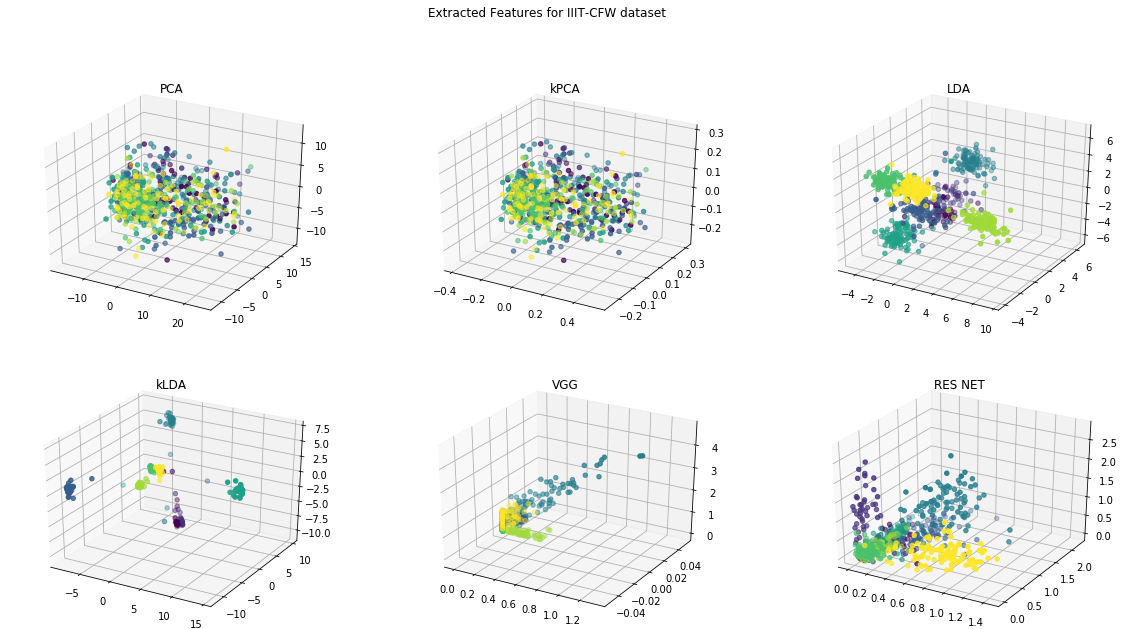

In [253]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(231, projection='3d')
ax.set_title('PCA')
ax.scatter(X_IIIT_pca[:,0],X_IIIT_pca[:,1],X_IIIT_pca[:,2],c=y_IIIT)

ax = fig.add_subplot(232, projection='3d')
ax.set_title('kPCA')
ax.scatter(X_IIIT_kpca[:,0],X_IIIT_kpca[:,1],X_IIIT_kpca[:,2],c=y_IIIT)

ax = fig.add_subplot(233, projection='3d')
ax.set_title('LDA')
ax.scatter(X_IIIT_lda[:,0],X_IIIT_lda[:,1],X_IIIT_lda[:,2],c=y_IIIT)

ax = fig.add_subplot(234, projection='3d')
ax.set_title('kLDA')
ax.scatter(X_IIIT_klda[:,0],X_IIIT_klda[:,1],X_IIIT_klda[:,2],c=y_IIIT)

ax = fig.add_subplot(235, projection='3d')
ax.set_title('VGG')
ax.scatter(X_IIIT_vgg[:,0],X_IIIT_vgg[:,1],X_IIIT_vgg[:,2],c=y_IIIT)

ax = fig.add_subplot(236, projection='3d')
ax.set_title('RES NET')
ax.scatter(X_IIIT_resnet[:,0],X_IIIT_resnet[:,1],X_IIIT_resnet[:,2],c=y_IIIT)
plt.suptitle("Extracted Features for IIIT-CFW dataset")
# fig.savefig("plots/IIIT-CFW_features.eps")

Text(0.5, 0.98, 'Extracted Features for IMFDB dataset')

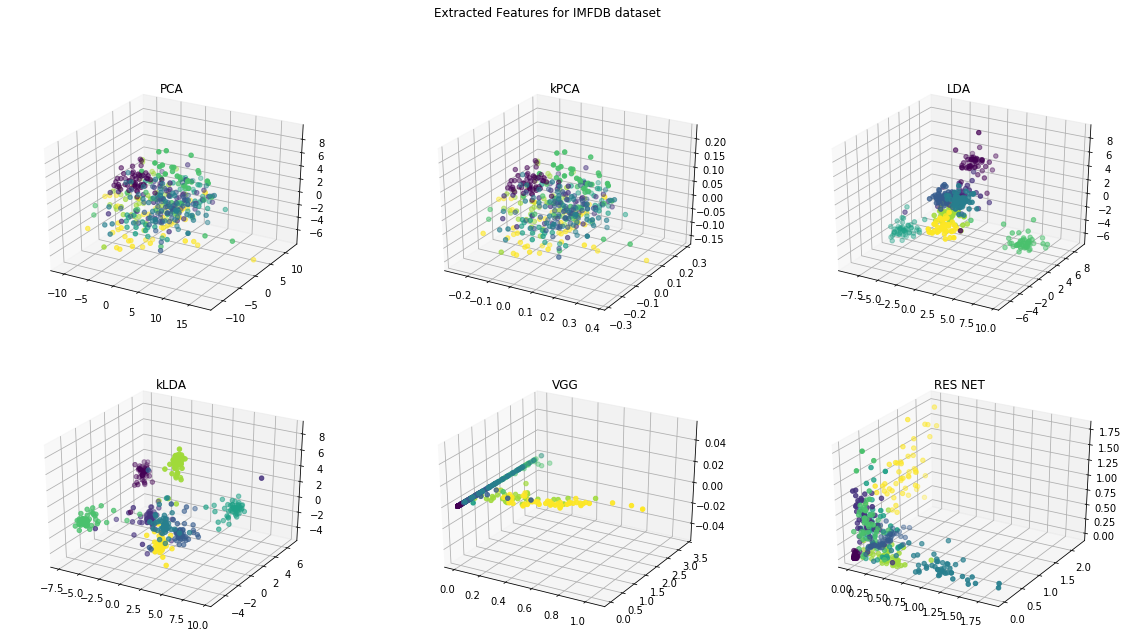

In [254]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(231, projection='3d')
ax.set_title('PCA')
ax.scatter(X_IMFDB_pca[:,0],X_IMFDB_pca[:,1],X_IMFDB_pca[:,2],c=y_IMFDB)

ax = fig.add_subplot(232, projection='3d')
ax.set_title('kPCA')
ax.scatter(X_IMFDB_kpca[:,0],X_IMFDB_kpca[:,1],X_IMFDB_kpca[:,2],c=y_IMFDB)

ax = fig.add_subplot(233, projection='3d')
ax.set_title('LDA')
ax.scatter(X_IMFDB_lda[:,0],X_IMFDB_lda[:,1],X_IMFDB_lda[:,2],c=y_IMFDB)

ax = fig.add_subplot(234, projection='3d')
ax.set_title('kLDA')
ax.scatter(X_IMFDB_klda[:,0],X_IMFDB_klda[:,1],X_IMFDB_klda[:,2],c=y_IMFDB)

ax = fig.add_subplot(235, projection='3d')
ax.set_title('VGG')
ax.scatter(X_IMFDB_vgg[:,0],X_IMFDB_vgg[:,1],X_IMFDB_vgg[:,2],c=y_IMFDB)

ax = fig.add_subplot(236, projection='3d')
ax.set_title('RES NET')
ax.scatter(X_IMFDB_resnet[:,0],X_IMFDB_resnet[:,1],X_IMFDB_resnet[:,2],c=y_IMFDB)
plt.suptitle("Extracted Features for IMFDB dataset")
# fig.savefig("plots/IMFDB_features.eps")

Text(0.5, 0.98, 'Extracted Features for YALE dataset')

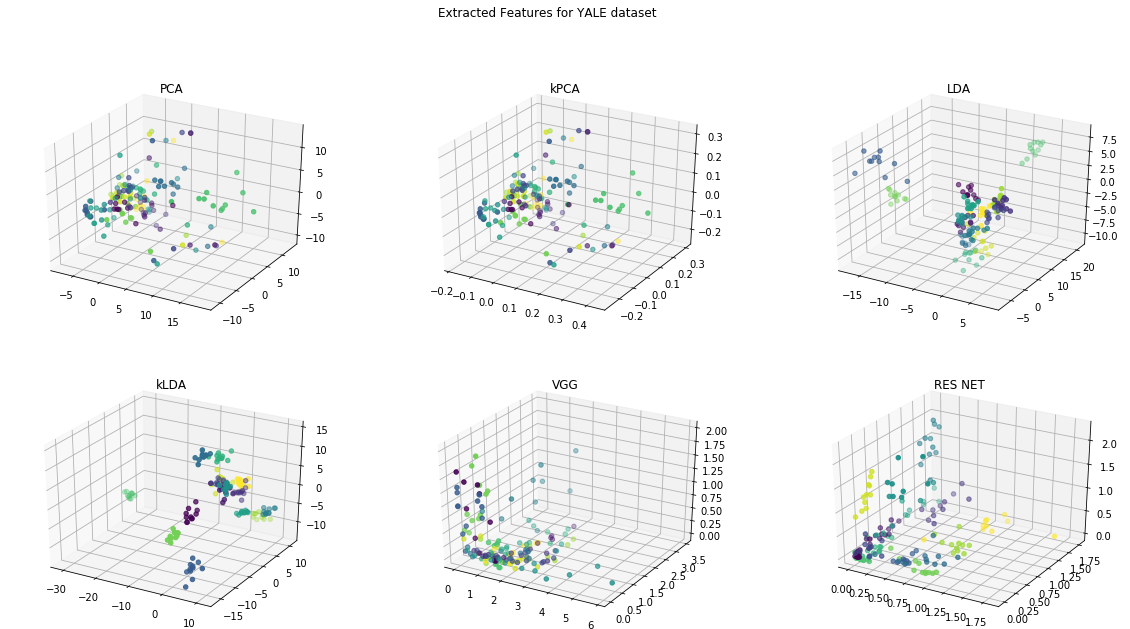

In [255]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(231, projection='3d')
ax.set_title('PCA')
ax.scatter(X_YALE_pca[:,0],X_YALE_pca[:,1],X_YALE_pca[:,2],c=y_YALE)

ax = fig.add_subplot(232, projection='3d')
ax.set_title('kPCA')
ax.scatter(X_YALE_kpca[:,0],X_YALE_kpca[:,1],X_YALE_kpca[:,2],c=y_YALE)

ax = fig.add_subplot(233, projection='3d')
ax.set_title('LDA')
ax.scatter(X_YALE_lda[:,0],X_YALE_lda[:,1],X_YALE_lda[:,2],c=y_YALE)

ax = fig.add_subplot(234, projection='3d')
ax.set_title('kLDA')
ax.scatter(X_YALE_klda[:,0],X_YALE_klda[:,1],X_YALE_klda[:,2],c=y_YALE)

ax = fig.add_subplot(235, projection='3d')
ax.set_title('VGG')
ax.scatter(X_YALE_vgg[:,0],X_YALE_vgg[:,1],X_YALE_vgg[:,2],c=y_YALE)

ax = fig.add_subplot(236, projection='3d')
ax.set_title('RES NET')
ax.scatter(X_YALE_resnet[:,0],X_YALE_resnet[:,1],X_YALE_resnet[:,2],c=y_YALE)
plt.suptitle("Extracted Features for YALE dataset")
# fig.savefig("plots/Yale_features.eps")

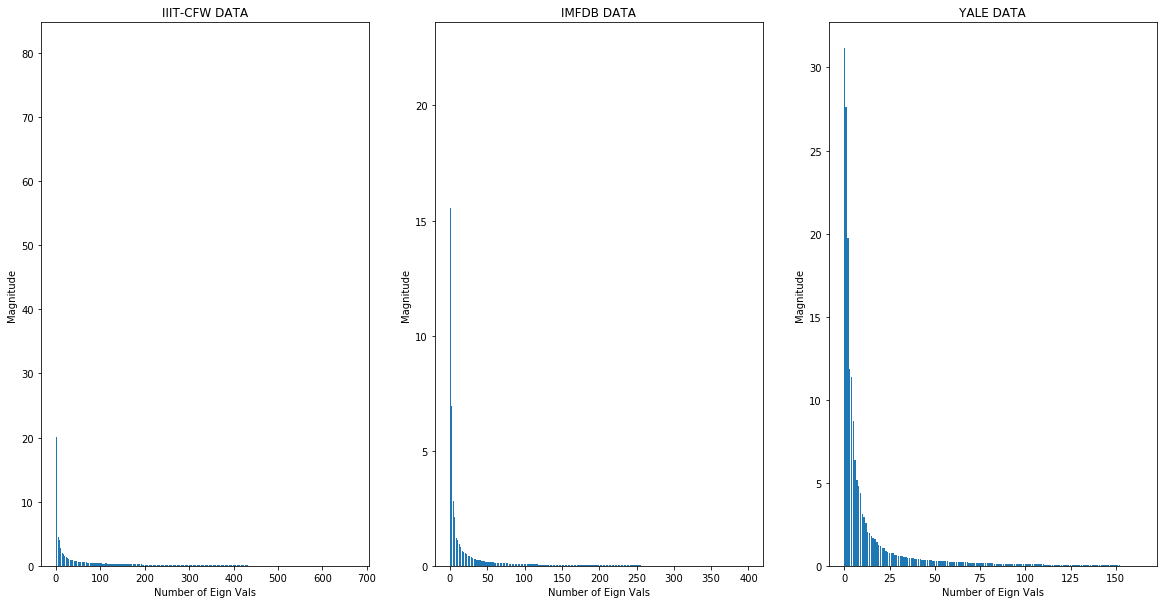

In [256]:
# Plot the eigen value spectrum 

eig_vals_IIIT , eig_vecs_IIIT = linalg.eig(np.cov(X_IIIT.T))
eig_vals_IMFDB = np.abs(eig_vals_IIIT)

eig_vals_IMFDB , eig_vecs_IMFDB = linalg.eig(np.cov(X_IMFDB.T))
eig_vals_IMFDB = np.abs(eig_vals_IMFDB)

eig_vals_YALE , eig_vecs_YALE = linalg.eig(np.cov(X_YALE.T))
eig_vals_YALE = np.abs(eig_vals_YALE)

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(131)
ax.bar(np.arange(672),eig_vals_IIIT[0:672])
ax.set_title('IIIT-CFW DATA')
ax.set_xlabel('Number of Eign Vals')
ax.set_ylabel('Magnitude')

ax = fig.add_subplot(132)
ax.bar(np.arange(400),eig_vals_IMFDB[0:400])
ax.set_title('IMFDB DATA')
ax.set_xlabel('Number of Eign Vals')
ax.set_ylabel('Magnitude')

ax = fig.add_subplot(133)
ax.bar(np.arange(165),eig_vals_YALE[0:165])
ax.set_title('YALE DATA')
ax.set_xlabel('Number of Eign Vals')
ax.set_ylabel('Magnitude')

plt.show()
fig.savefig("plots/Eign_spectrum.eps")

IIIT-CFW DATA : Requires 100 eign values to be satisfactorily constructed back. 

IMFDB DATA : Requires 75 eign values to be satisfactorily constructed back.

YALE DATA : Requires 75 eign values to be satisfactorily constructed back.


1(c). Reconstruct  the  image  back for each case


In [257]:
def reconstruct_images(X,k,val):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    
    if val == 1:
        print("Reconstruction Using PCA")
        _ , reconstruct_X = get_pca(X,k)
        err = np.sqrt(np.mean((X - reconstruct_X)**2))
        print("Reconstruction Error with PCA:",err)
    elif val == 0:
        print("Reconstruction Using kPCA")
        _ , reconstruct_X = get_kernel_pca(X,k)
        err = np.sqrt(np.mean((X - reconstruct_X)**2))
        print("Reconstruction Error with kPCA:",err)
#     elif val == 2:
#         print("Reconstruction Using LDA")
#         _ , reconstruct_X = get_lda(X,k)
#         print("Reconstruction Error with LDA:",end=' ')
#     elif val == 3:
#         print("Reconstruction Using kLDA")
#         _ , reconstruct_X = get_kernel_lda(X,k)
#         print("Reconstruction Error with kLDA:",end=' ')
    else:
        print("No feature Representation Found")

    
    return reconstruct_X    

Dataset = IIIT
Reconstruction Using kPCA
Reconstruction Error with kPCA: 0.2640374674073691


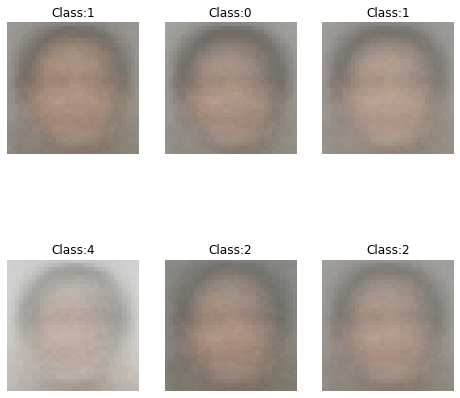

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction Using PCA
Reconstruction Error with PCA: 0.14904060739673802


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


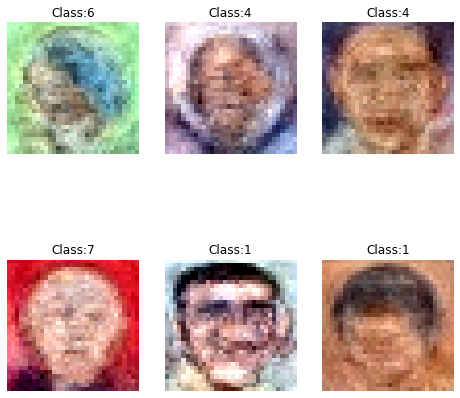


Dataset = IMFDB
Reconstruction Using kPCA
Reconstruction Error with kPCA: 0.16183003442774052


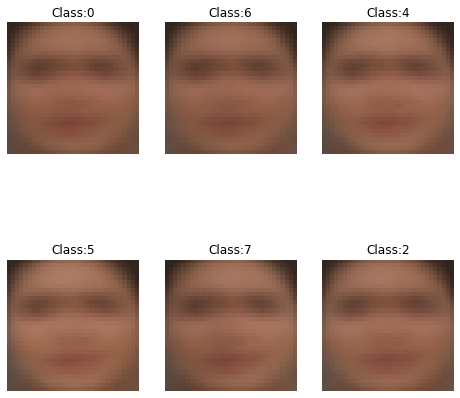

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction Using PCA
Reconstruction Error with PCA: 0.0573196264392848


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


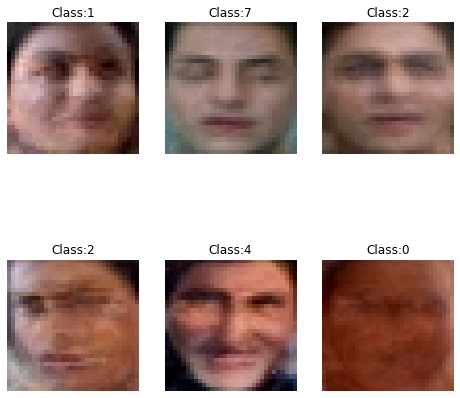


Dataset = YALE
Reconstruction Using kPCA
Reconstruction Error with kPCA: 0.22723695204047184


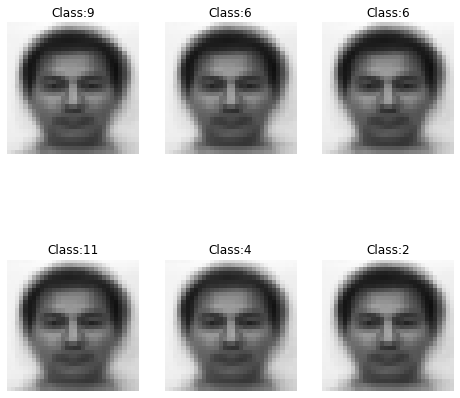

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction Using PCA
Reconstruction Error with PCA: 0.07131855743421403


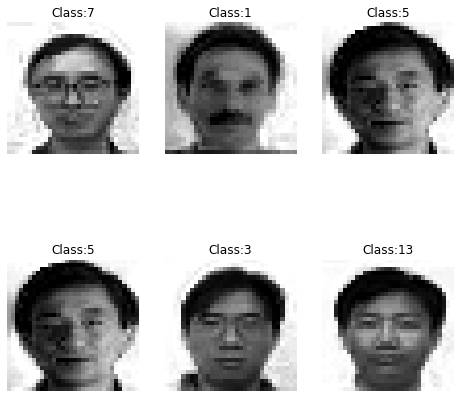

In [258]:
def reconstruction(X,y,N,H,W,C,k,dataset):
    print("Dataset =",dataset)
    for i in range(2):
        # Display results 
        X_reconstructed = reconstruct_images(X,k,i)

        # Display random images
        X_reconstructed_3D = X_reconstructed.reshape(N,H,W,C)
#         X_reconstructed_3D = (X_reconstructed_3D - np.min(X_reconstructed_3D))/(np.max(X_reconstructed_3D)-np.min(X_reconstructed_3D))
        ind = np.random.randint(0,y.shape[0],6)
        disply_images(X_reconstructed_3D[ind,...],y[ind],row=2,col=3)

    return X_reconstructed, X_reconstructed_3D
        
k_IIIT = 75
X_IIIT_reconstructed_pca , X_IIIT_reconstructed_pca_3D = reconstruction(X_IIIT,y_IIIT,N_IIIT,H_IIIT,W_IIIT,C_IIIT,k_IIIT,"IIIT")
print()

k_IMFDB = 60
X_IMFDB_reconstructed_pca , X_IMFDB_reconstructed_pca_3D = reconstruction(X_IMFDB,y_IMFDB,N_IMFDB,H_IMFDB,W_IMFDB,C_IMFDB,k_IMFDB,"IMFDB")
print()

k_YALE = 40
X_YALE_reconstructed_pca , X_YALE_reconstructed_pca_3D = reconstruction(X_YALE,y_YALE,N_YALE,H_YALE,W_YALE,C_YALE,k_YALE,"YALE")
print()


1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

In [259]:
# # code goes here

# num_classes = 8
# num_per_class = N // 8

# classes_data = np.empty((num_classes,num_per_class,H*W*C))
# ctrs = np.zeros(num_classes)

# ## extract each class
# for i in range(N):
#     for j in range(num_classes):
#         if y[i] == j:
#             classes_data[j][int(ctrs[j])] = X[i]
#             ctrs[j] += 1

# errors = []
# ## for each class do reconstruction/ plot eign value spectrum
# for i in range(num_classes):
#     class_data = classes_data[i]
#     class_pca , class_reconstructed_pca = get_pca(class_data,10)
#     err = np.sqrt(np.mean((class_data - class_reconstructed_pca)**2))
#     print("Reconstruction Error for class",i+1,err)
#     errors.append(err)

# print("Class",errors.index(max(errors))+1,"has maximum error")

In [260]:
# code goes here
def class_with_max_rec_error(data_dict, X, X_reconstructed_pca, y,k, dataset):
    num_classes = len(data_dict)
    rec_errors_pca = np.zeros(num_classes)
    print('Dataset = ', dataset)
    for i in range(num_classes):
        rec_errors_pca[i] = np.sqrt(np.mean((X[y==i,:] - X_reconstructed_pca[y==i,:])**2))
    max_idx = np.argmax(rec_errors_pca)
    
    if (dataset is not 'YALE'):
        print('Using PCA with k =',k,'components. Class with highest reconstruction error is', 'class_num =', max_idx,list(data_dict.keys())[max_idx])
    else:
        print('Using PCA, with k =',k,'components. Class with highest reconstruction error = ',max_idx)

class_with_max_rec_error(cfw_dict, X_IIIT, X_IIIT_reconstructed_pca, y_IIIT,k_IIIT ,'IIIT-CFW')
class_with_max_rec_error(imfdb_dict, X_IMFDB, X_IMFDB_reconstructed_pca, y_IMFDB,k_IMFDB ,'IMFDB')
class_with_max_rec_error(range(1,16,1), X_YALE, X_YALE_reconstructed_pca, y_YALE,k_YALE,'YALE')

Dataset =  IIIT-CFW
Using PCA with k = 75 components. Class with highest reconstruction error is class_num = 5 NarendraModi
Dataset =  IMFDB
Using PCA with k = 60 components. Class with highest reconstruction error is class_num = 3 ShilpaShetty
Dataset =  YALE
Using PCA, with k = 40 components. Class with highest reconstruction error =  7


Amir khan is the person who is most difficult to represent in fewer eign vectors since he has many different kinds of emotions and also his facial expressions vary a lot. We also know this as a fact that he is called Mr. Perfectionist because of his acting skills.

2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 


You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [261]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 

class Classifier():
    def __init__(self):
        super().__init__()
        self.clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, solver = 'adam', activation='relu')
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.clf.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return confusion_matrix(pred, y)

    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.clf.fit(X_train, y_train)
        
    def validate(self,X_train,y_train,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """

        self.train(X_train, y_train)
        validation_prediction = self.classify(X_validate)
        
        # Create a confusion matrix
        conf_mat = self.confusion_matrix(validation_prediction, y_validate)
        
        # Calculate Validation accuracy 
        validation_accuracy = self.clf.score(X_validate, y_validate)
        
        # Calculate precision and recall 
        validation_precision = precision_score(y_validate, validation_prediction, average = 'macro')
        validation_recall = recall_score(y_validate, validation_prediction, average = 'macro')
        
        # Calculate F1-score
        validation_f1 = f1_score(y_validate, validation_prediction, average = 'macro')
    
        return validation_accuracy,validation_precision,validation_recall,validation_f1,conf_mat

In [262]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

In [263]:
# Create a train and validation split to train your classifier 

def train_validation_split(data, labels, test_size = 0.2, random_state = 42):
    train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, test_size = test_size, random_state = random_state)
    
    return train_data, train_labels,validation_data, validation_labels

In [264]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)
def get_train_and_val_features(train_data,train_labels,val_data,val_labels,k,algo):
#     print(train_data.shape,val_data.shape)
    if algo == "PCA":
        pca = PCA(n_components=k)
        train_data_k = pca.fit_transform(train_data)
        val_data_k = pca.transform(val_data)
    elif algo == "KPCA":
        kpca = KernelPCA(n_components=k,fit_inverse_transform=True)
        train_data_k = kpca.fit_transform(train_data)
        val_data_k = kpca.transform(val_data)
    elif algo == "LDA":
        lda = LDA(n_components=3)
        train_data_k = lda.fit_transform(train_data,train_labels)
        val_data_k = lda.transform(val_data)
    elif algo == "KLDA":
        var1 = np.var(train_data)
        var2 = np.var(val_data)
        train_data_transformed = np.exp(-np.square(train_data-np.mean(train_data))/(2*var1))
        val_data_transformed = np.exp(-np.square(val_data-np.mean(val_data))/(2*var2))
        klda = LDA(n_components=k)
        train_data_k = klda.fit_transform(train_data_transformed,train_labels)
        val_data_k = klda.transform(val_data_transformed)
    return train_data_k , val_data_k

def classifier(train_data,train_labels,val_data,val_labels):
    clf = Classifier()
    return(clf.validate(train_data,train_labels,val_data,val_labels))

fe_methods = (['PCA', 'KPCA', 'LDA', 'KLDA', 'VGG', 'ResNet', 'VGG + PCA', 'VGG + LDA', 'ResNet + PCA', 'ResNet + LDA'])
# fe_methods = (['PCA', 'KPCA', 'LDA', 'KLDA', 'VGG', 'ResNet'])
# fe_methods = (['PCA', 'KPCA', 'LDA', 'KLDA'])
# fe_methods = (['VGG', 'ResNet'])
columns = (['Reduced Dimension', 'Error', 'Precision','Recall','F1-Score'])

conf_mat_dict = {}

In [265]:
def get_stats(X, y, k, dataset):
    stats = []
    X_train,y_train,X_val, y_val = train_validation_split(X, y)
    if dataset == "IIIT":
        direc = dirpath1
    elif dataset == "IMFDB":
        direc = dirpath2
    else:
        direc = dirpath3
    
#     print(direc)
    # pca
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "PCA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_dict[dataset+" "+"PCA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # kpca
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "KPCA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_dict[dataset+" "+"KPCA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # lda
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "LDA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_dict[dataset+" "+"LDA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    #klda
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "KLDA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_dict[dataset+" "+"KLDA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # vgg
    X_train, y_train,X_val, y_val = train_validation_split(get_vgg_features(direc), y)
    dim = X_train.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train, y_train, X_val, y_val)
    conf_mat_dict[dataset+" "+"VGG"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # resnet
    X_train, y_train,X_val, y_val = train_validation_split(get_resnet_features(direc), y)
    dim = X_train.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train, y_train, X_val, y_val)
    conf_mat_dict[dataset+" "+"RESNET"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))

    # vgg + pca
    X_train, y_train,X_val, y_val = train_validation_split(get_vgg_features(direc), y)
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "PCA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_dict[dataset+" "+"VGG PCA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
#     vgg + lda
    X_train, y_train,X_val, y_val = train_validation_split(get_vgg_features(direc), y)
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "LDA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_dict[dataset+" "+"VGG LDA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # resnet + pca
    X_train, y_train,X_val, y_val = train_validation_split(get_resnet_features(direc), y)
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "PCA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_dict[dataset+" "+"RESNET PCA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # resnet + lda
    X_train, y_train,X_val, y_val = train_validation_split(get_resnet_features(direc), y)
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "LDA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_dict[dataset+" "+"RESNET LDA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    return stats

In [266]:
IIIT_stats = get_stats(X_IIIT,y_IIIT,k_IIIT,"IIIT")
df_IIIT = pd.DataFrame(data = np.asarray(IIIT_stats), index = fe_methods, columns = columns)
print("Table for IIIT-CFW DATASET")
print(df_IIIT)

Table for IIIT-CFW DATASET
              Reduced Dimension      Error  Precision    Recall  F1-Score
PCA                        75.0  42.962963   0.557308  0.564299  0.550372
KPCA                       75.0  45.925926   0.532835  0.558488  0.535327
LDA                         3.0  71.111111   0.277732  0.271405  0.267415
KLDA                        7.0  84.444444   0.162603  0.171188  0.160431
VGG                      4096.0  28.888889   0.697793  0.677018  0.670272
ResNet                   2048.0   2.222222   0.975486  0.983820  0.979289
VGG + PCA                  75.0  33.333333   0.633461  0.625633  0.626695
VGG + LDA                   3.0  54.814815   0.455354  0.421296  0.419099
ResNet + PCA               75.0   2.962963   0.970504  0.977241  0.973366
ResNet + LDA                3.0   9.629630   0.898943  0.886952  0.886687


In [267]:
IMFDB_stats = get_stats(X_IMFDB,y_IMFDB,k_IMFDB,"IMFDB")
df_IMFDB = pd.DataFrame(data = np.asarray(IMFDB_stats), index = fe_methods, columns = columns)
print("Table for IMFDB DATASET")
print(df_IMFDB)

Table for IMFDB DATASET
              Reduced Dimension  Error  Precision    Recall  F1-Score
PCA                        60.0  13.75   0.858188  0.884241  0.862115
KPCA                       60.0  15.00   0.851136  0.866868  0.847208
LDA                         3.0  42.50   0.570524  0.594437  0.563998
KLDA                        7.0  25.00   0.755885  0.780438  0.748523
VGG                      4096.0  10.00   0.918364  0.893441  0.902830
ResNet                   2048.0   5.00   0.945933  0.948664  0.945486
VGG + PCA                  60.0  12.50   0.875080  0.864220  0.868258
VGG + LDA                   3.0  52.50   0.472159  0.471060  0.455277
ResNet + PCA               60.0   7.50   0.932143  0.929433  0.927865
ResNet + LDA                3.0  15.00   0.873601  0.871741  0.860609


In [268]:
YALE_stats = get_stats(X_YALE,y_YALE,k_YALE,"YALE")
df_YALE = pd.DataFrame(data = np.asarray(YALE_stats), index = fe_methods, columns = columns)
print("Table for YALE DATASET")
print(df_YALE)

Table for YALE DATASET
              Reduced Dimension      Error  Precision    Recall  F1-Score
PCA                        40.0  12.121212   0.811111  0.833333  0.808889
KPCA                       40.0  18.181818   0.809524  0.845238  0.802381
LDA                         3.0  27.272727   0.714286  0.690476  0.666667
KLDA                       14.0  15.151515   0.807143  0.809524  0.765873
VGG                      4096.0  42.424242   0.555556  0.527778  0.503333
ResNet                   2048.0   3.030303   0.964286  0.964286  0.952381
VGG + PCA                  40.0  45.454545   0.462222  0.483333  0.458384
VGG + LDA                   3.0  66.666667   0.294048  0.273810  0.243027
ResNet + PCA               40.0   0.000000   1.000000  1.000000  1.000000
ResNet + LDA                3.0  12.121212   0.892857  0.880952  0.876190


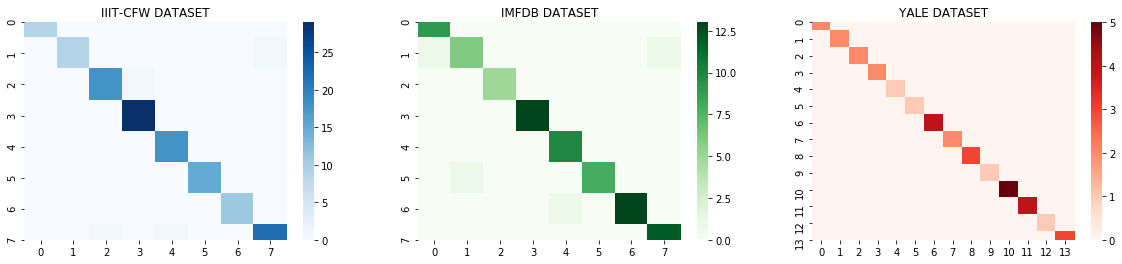

In [269]:
# For each dataset print the confusion matrix for the best model
import seaborn as sns

fig = plt.figure(figsize=(20,4))

data_mat = conf_mat_dict["IIIT RESNET PCA"]
fig.add_subplot(131)
ax = sns.heatmap(data_mat,cmap="Blues")
ax.set_title("IIIT-CFW DATASET")


data_mat = conf_mat_dict["IMFDB RESNET"]
fig.add_subplot(132)
ax = sns.heatmap(data_mat,cmap="Greens")
ax.set_title("IMFDB DATASET")

data_mat = conf_mat_dict["YALE RESNET PCA"]
fig.add_subplot(133)
ax = sns.heatmap(data_mat,cmap="Reds")
ax.set_title("YALE DATASET")

plt.show()
fig.savefig("plots/Conf_mat_mlp.eps")

3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

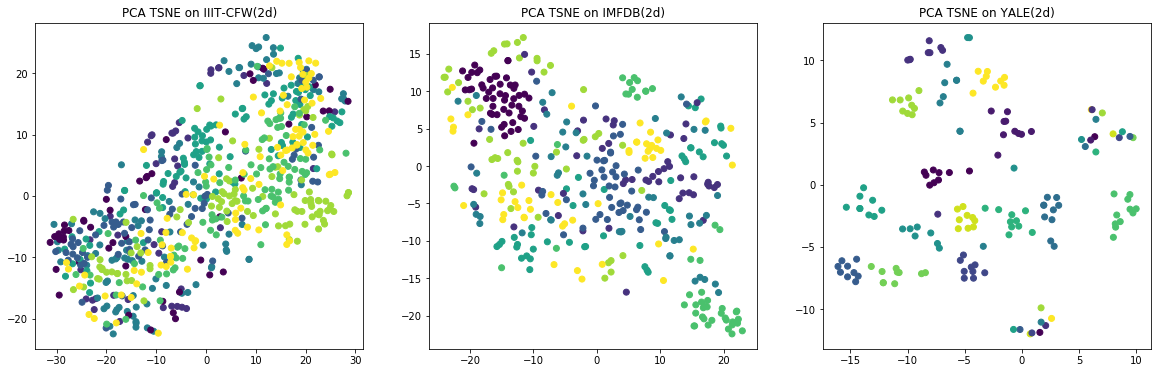

In [270]:
# Compute TSNE for different features and create a scatter plot

# X =  # feature 
k = 3 # Number of components in TSNE

# Compute with pca
X_IIIT_TSNE_pca = TSNE(n_components=2).fit_transform(X_IIIT_pca)
X_IMFDB_TSNE_pca = TSNE(n_components=2).fit_transform(X_IMFDB_pca)
X_YALE_TSNE_pca = TSNE(n_components=2).fit_transform(X_YALE_pca)

# Plot the representation in 2d
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(131)
ax.scatter(X_IIIT_TSNE_pca[:,0],X_IIIT_TSNE_pca[:,1],c=y_IIIT)
ax.set_title("PCA TSNE on IIIT-CFW(2d)")

ax = fig.add_subplot(132)
ax.scatter(X_IMFDB_TSNE_pca[:,0],X_IMFDB_TSNE_pca[:,1],c=y_IMFDB)
ax.set_title("PCA TSNE on IMFDB(2d)")

ax = fig.add_subplot(133)
ax.scatter(X_YALE_TSNE_pca[:,0],X_YALE_TSNE_pca[:,1],c=y_YALE)
ax.set_title("PCA TSNE on YALE(2d)")

plt.show()
fig.savefig("plots/tsne_pca_2d.eps")

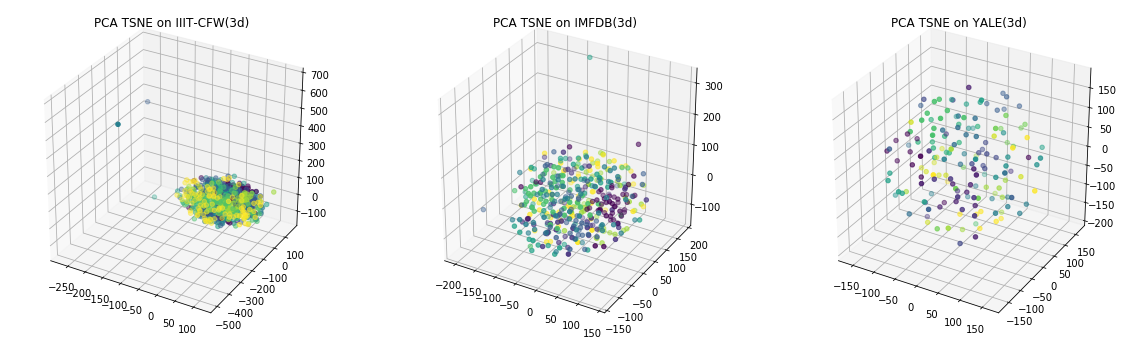

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [271]:
# Compute with pca
X_IIIT_TSNE_pca = TSNE(n_components=k).fit_transform(X_IIIT_pca)
X_IMFDB_TSNE_pca = TSNE(n_components=k).fit_transform(X_IMFDB_pca)
X_YALE_TSNE_pca = TSNE(n_components=k).fit_transform(X_YALE_pca)

# Plot the representation in 3d
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(131,projection='3d')
ax.scatter(X_IIIT_TSNE_pca[:,0],X_IIIT_TSNE_pca[:,1],X_IIIT_TSNE_pca[:,2],c=y_IIIT)
ax.set_title("PCA TSNE on IIIT-CFW(3d)")

ax = fig.add_subplot(132,projection='3d')
ax.scatter(X_IMFDB_TSNE_pca[:,0],X_IMFDB_TSNE_pca[:,1],X_IMFDB_TSNE_pca[:,2],c=y_IMFDB)
ax.set_title("PCA TSNE on IMFDB(3d)")

ax = fig.add_subplot(133,projection='3d')
ax.scatter(X_YALE_TSNE_pca[:,0],X_YALE_TSNE_pca[:,1],X_YALE_TSNE_pca[:,2],c=y_YALE)
ax.set_title("PCA TSNE on YALE(3d)")

plt.show()
fig.savefig("plots/tsne_pca_3d.eps")

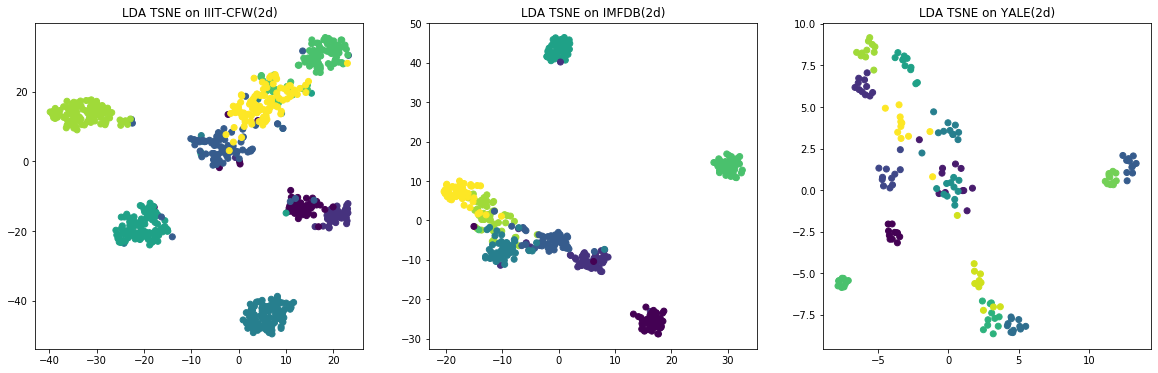

In [272]:
# Compute with lda
X_IIIT_TSNE_lda = TSNE(n_components=2).fit_transform(X_IIIT_lda)
X_IMFDB_TSNE_lda = TSNE(n_components=2).fit_transform(X_IMFDB_lda)
X_YALE_TSNE_lda = TSNE(n_components=2).fit_transform(X_YALE_lda)

# Plot the representation in 2d
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(131)
ax.scatter(X_IIIT_TSNE_lda[:,0],X_IIIT_TSNE_lda[:,1],c=y_IIIT)
ax.set_title("LDA TSNE on IIIT-CFW(2d)")

ax = fig.add_subplot(132)
ax.scatter(X_IMFDB_TSNE_lda[:,0],X_IMFDB_TSNE_lda[:,1],c=y_IMFDB)
ax.set_title("LDA TSNE on IMFDB(2d)")

ax = fig.add_subplot(133)
ax.scatter(X_YALE_TSNE_lda[:,0],X_YALE_TSNE_lda[:,1],c=y_YALE)
ax.set_title("LDA TSNE on YALE(2d)")

plt.show()
fig.savefig("plots/tsne_lda_2d.eps")

In [ ]:
# Compute with lda
X_IIIT_TSNE_lda = TSNE(n_components=k).fit_transform(X_IIIT_lda)
X_IMFDB_TSNE_lda = TSNE(n_components=k).fit_transform(X_IMFDB_lda)
X_YALE_TSNE_lda = TSNE(n_components=k).fit_transform(X_YALE_lda)


# Plot the representation in 3d
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(131,projection='3d')
ax.scatter(X_IIIT_TSNE_lda[:,0],X_IIIT_TSNE_lda[:,1],X_IIIT_TSNE_lda[:,2],c=y_IIIT)
ax.set_title("LDA TSNE on IIIT-CFW(3d)")

ax = fig.add_subplot(132,projection='3d')
ax.scatter(X_IMFDB_TSNE_lda[:,0],X_IMFDB_TSNE_lda[:,1],X_IMFDB_TSNE_lda[:,2],c=y_IMFDB)
ax.set_title("LDA TSNE on IMFDB(3d)")

ax = fig.add_subplot(133,projection='3d')
ax.scatter(X_YALE_TSNE_lda[:,0],X_YALE_TSNE_lda[:,1],X_YALE_TSNE_lda[:,2],c=y_YALE)
ax.set_title("LDA TSNE on YALE(3d)")

plt.show()
fig.savefig("plots/tsne_lda_3d.eps")

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
class FaceVerification(object):
    def __init__(self,n_neighbours):
        super().__init__()
        self.classifier = KNeighborsClassifier(n_neighbors=n_neighbours)
        
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        X = X.reshape(1,-1)
        predicted_class = self.classifier.predict(X)
        
#         return verfication_results
        return (predicted_class == class_id)
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.classifier.fit(X_train,y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        total_samples = len(X_validate)
        
        ## method 1
#         predicted = np.ones((total_samples),dtype=bool)
#         for i in range(total_samples):
#             predicted[i] = self.verify(X_validate[i],y_validate[i])

        
        ##method 2
        predicted = self.classifier.predict(X_validate)
#         return metrics.accuracy_score(y_validate,predicted)
        
        validation_accuracy = self.classifier.score(X_validate, y_validate) * 100
        
#         # Calculate precision and recall 
        validation_precision = precision_score(y_validate, predicted, average = 'macro')
        validation_recall = recall_score(y_validate, predicted, average = 'macro')
        
#         # Calculate F1-score
        validation_f1 = f1_score(y_validate, predicted, average = 'macro')
        
        return metrics.accuracy_score(y_validate,predicted)* 100
#         return 100-validation_accuracy,validation_accuracy,validation_precision

In [ ]:
# Create a train and validation split to train your classifier 

def train_validation_split(data, labels, test_size = 0.2, random_state = 2):
    train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, test_size = test_size, random_state = random_state)
    
    return train_data, train_labels,validation_data, validation_labels

In [ ]:
def apply_fe(train_X,train_y,val_X,val_y,method,k,dataset,y):
    
    direc = ' '
    if dataset == "IIIT":
        direc = dirpath1
    elif dataset == "IMFDB":
        direc = dirpath2
    elif dataset == "YALE":
        direc = dirpath3
        
    method = method.lower()
    
    if method == "pca":
        train_X_k , _ = get_pca(train_X,k)
        val_X_k , _ = get_pca(val_X,k)
    elif method == "kpca":
        train_X_k , _ = get_kernel_pca(train_X,k)
        val_X_k , _ = get_kernel_pca(val_X,k)
    elif method == "lda":
        train_X_k = get_lda(train_X,train_y,k)
        val_X_k = get_lda(val_X,val_y,k)
    elif method == "klda":
        train_X_k  = get_kernel_lda(train_X,train_y,k)
        val_X_k = get_kernel_lda(val_X,val_y,k)
    elif method == "vgg":
        train_X_k , train_y,val_X_k , val_Y = train_validation_split(get_vgg_features(direc), y)
    elif method == "resnet":
        train_X_k , train_y,val_X_k , val_Y = train_validation_split(get_resnet_features(direc), y)
    else:
        train_X_k, train_y, val_X_k, val_Y = train_X,train_y,val_X,val_y
    
    return train_X_k, train_y, val_X_k, val_y

In [ ]:
fe_methods = ["None","PCA","KPCA","LDA","VGG","RESNET"]

In [ ]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision

# Print the table. (You can use Pandas)
fig = plt.figure(figsize=(20,10))
k_range = range(1,12,2)

for i in range(len(fe_methods)):
    train_X_IIIT , train_y_IIIT , val_X_IIIT, val_y_IIIT = train_validation_split(X_IIIT,y_IIIT)
    train_X_IIIT , train_y_IIIT , val_X_IIIT, val_y_IIIT = apply_fe(train_X_IIIT,train_y_IIIT,val_X_IIIT,val_y_IIIT,fe_methods[i],k_IIIT,"IIIT",y_IIIT)
    accuracy_scores = []
    for k in k_range:
        FV_object = FaceVerification(k)
        FV_object.train(train_X_IIIT,train_y_IIIT)
        accuracy_scores.append(FV_object.validate(val_X_IIIT,val_y_IIIT))
    
#     print(fe_methods[i],accuracy_scores)
#     print(i)
    ax = fig.add_subplot(2,3,i+1)
    ax.plot(k_range,accuracy_scores)
    ax.set_xlabel("K values")
    ax.set_ylabel("Accuracies")
    ax.set_title(fe_methods[i]+"+KNN on IIIT-CFW dataset")

plt.show()
fig.savefig("plots/k_vs_acc_iiit.eps")

    
## INBUILT MODEL
# knn = KNeighborsClassifier(n_neighbors=7)
# knn.fit(train_X_IIIT, train_y_IIIT)
# y_pred = knn.predict(val_X_IIIT)
# print(metrics.accuracy_score(val_y_IIIT, y_pred))

In [ ]:
fig = plt.figure(figsize=(20,10))
k_range = range(1,12,2)

for i in range(len(fe_methods)):
    train_X_IMFDB , train_y_IMFDB , val_X_IMFDB, val_y_IMFDB = train_validation_split(X_IMFDB,y_IMFDB)
    train_X_IMFDB , train_y_IMFDB , val_X_IMFDB, val_y_IMFDB = apply_fe(train_X_IMFDB,train_y_IMFDB,val_X_IMFDB,val_y_IMFDB,fe_methods[i],k_IMFDB,"IMFDB",y_IMFDB)
    accuracy_scores = []
    for k in k_range:
        FV_object = FaceVerification(k)
        FV_object.train(train_X_IMFDB,train_y_IMFDB)
        accuracy_scores.append(FV_object.validate(val_X_IMFDB,val_y_IMFDB))
    
#     print(accuracy_scores)

    ax = fig.add_subplot(2,3,i+1)
    ax.plot(k_range,accuracy_scores)
    ax.set_xlabel("K values")
    ax.set_ylabel("Accuracies")
    ax.set_title(fe_methods[i]+"+KNN on  IMFDB-CFW dataset")

plt.show()
fig.savefig("plots/k_vs_acc_imfdb.eps")

In [ ]:
fig = plt.figure(figsize=(20,10))
k_range = range(1,12,2)
k_YALE_mod = 10

for i in range(len(fe_methods)):
    train_X_YALE , train_y_YALE , val_X_YALE, val_y_YALE = train_validation_split(X_YALE,y_YALE)
    train_X_YALE , train_y_YALE , val_X_YALE, val_y_YALE = apply_fe(train_X_YALE,train_y_YALE,val_X_YALE,val_y_YALE,fe_methods[i],k_YALE_mod,"YALE",y_YALE)
    accuracy_scores = []
    for k in k_range:
        FV_object = FaceVerification(k)
        FV_object.train(train_X_YALE,train_y_YALE)
        accuracy_scores.append(FV_object.validate(val_X_YALE,val_y_YALE))
    
#     print(fe_methods[i])

    ax = fig.add_subplot(2,3,i+1)
    ax.plot(k_range,accuracy_scores)
    ax.set_xlabel("K values")
    ax.set_ylabel("Accuracies")
    ax.set_title(fe_methods[i]+"+KNN on  YALE-CFW dataset")

plt.show()
fig.savefig("plots/k_vs_acc_yale.eps")

### Extenstion / Application
    Create a system for any one of the following problems:

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

In [ ]:
# Define your features
# Load data
cfw_gender_dict = {'Amitabhbachan': 0,
    'AamirKhan': 0,
    'DwayneJohnson': 0,
    'AishwaryaRai': 1,
    'BarackObama': 0,
    'NarendraModi': 0,
    'ManmohanSingh': 0,
    'VladimirPutin': 0}

imfdb_gender_dict = {'MadhuriDixit': 1,
     'Kajol': 1,
     'SharukhKhan': 0,
     'ShilpaShetty': 1,
     'AmitabhBachan': 0,
     'KatrinaKaif': 1,
     'AkshayKumar': 0,
     'Amir': 0}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_gender_dict

    elif "IMFDB" in dir_path:
        label_dict = imfdb_gender_dict
    
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [ ]:
# Loading the dataset
# eg.

X_gender_CFW,y_gender_CFW = load_data(dirpath1)
X_gender_IMFDB,y_gender_IMFDB = load_data(dirpath2)

N_CFW,H_CFW,W_CFW = X_gender_CFW.shape[0:3]
C_CFW = 1 if opt['is_grayscale'] else X_gender_CFW.shape[3]

N_IMFDB,H_IMFDB,W_IMFDB = X_gender_IMFDB.shape[0:3]
C_IMFDB = 1 if opt['is_grayscale'] else X_gender_IMFDB.shape[3]

In [ ]:
# Show sample images
ind = np.random.randint(0,y_gender_CFW.shape[0],6)
disply_images(X_gender_CFW[ind,...],y_gender_CFW[ind], row=2,col=3)

In [ ]:
# Show sample images
ind = np.random.randint(0,y_gender_IMFDB.shape[0],6)
disply_images(X_gender_IMFDB[ind,...],y_gender_IMFDB[ind], row=2,col=3)

In [ ]:
# Flatten to apply PCA/LDA
X_gender_CFW = X_gender_CFW.reshape((N_CFW,H_CFW*W_CFW*C_CFW))
X_gender_IMFDB = X_gender_IMFDB.reshape((N_IMFDB,H_IMFDB*W_IMFDB*C_IMFDB))

In [ ]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 

class Classifier():
    def __init__(self):
        super().__init__()
        self.clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, solver = 'adam', activation='relu')
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.clf.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return confusion_matrix(pred, y)

    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.clf.fit(X_train, y_train)
        
    def validate(self,X_train,y_train,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """

        self.train(X_train, y_train)
        validation_prediction = self.classify(X_validate)
        
        # Create a confusion matrix
        conf_mat = self.confusion_matrix(validation_prediction, y_validate)
        
        # Calculate Validation accuracy 
        validation_accuracy = self.clf.score(X_validate, y_validate)
        
        # Calculate precision and recall 
        validation_precision = precision_score(y_validate, validation_prediction, average = 'macro')
        validation_recall = recall_score(y_validate, validation_prediction, average = 'macro')
        
        # Calculate F1-score
        validation_f1 = f1_score(y_validate, validation_prediction, average = 'macro')
    
        return validation_accuracy,validation_precision,validation_recall,validation_f1,conf_mat
    
    def get_predicted_labels(self,X_train,y_train,X_validate,y_validate):
        
        self.train(X_train, y_train)
        validation_prediction = self.classify(X_validate)
        return validation_prediction
        

In [ ]:
# Create a train and validation split to train your classifier 
def train_validation_split(data, labels, test_size = 0.2, random_state = 42):
    train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, test_size = test_size, random_state = random_state)
    
    return train_data, train_labels,validation_data, validation_labels

In [ ]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)
def get_train_and_val_features(train_data,train_labels,val_data,val_labels,k,algo):
#     print(train_data.shape,val_data.shape)
    if algo == "PCA":
        pca = PCA(n_components=k)
        train_data_k = pca.fit_transform(train_data)
        val_data_k = pca.transform(val_data)
    elif algo == "KPCA":
        kpca = KernelPCA(n_components=k,fit_inverse_transform=True)
        train_data_k = kpca.fit_transform(train_data)
        val_data_k = kpca.transform(val_data)
    elif algo == "LDA":
        lda = LDA(n_components=3)
        train_data_k = lda.fit_transform(train_data,train_labels)
        val_data_k = lda.transform(val_data)
    elif algo == "KLDA":
        var1 = np.var(train_data)
        var2 = np.var(val_data)
        train_data_transformed = np.exp(-np.square(train_data-np.mean(train_data))/(2*var1))
        val_data_transformed = np.exp(-np.square(val_data-np.mean(val_data))/(2*var2))
        klda = LDA(n_components=k)
        train_data_k = klda.fit_transform(train_data_transformed,train_labels)
        val_data_k = klda.transform(val_data_transformed)
    return train_data_k , val_data_k

def classifier(train_data,train_labels,val_data,val_labels):
    clf = Classifier()
    return(clf.validate(train_data,train_labels,val_data,val_labels))

fe_methods = (['PCA', 'KPCA', 'LDA', 'KLDA', 'VGG', 'ResNet', 'VGG + PCA', 'VGG + LDA', 'ResNet + PCA', 'ResNet + LDA'])
columns = (['Reduced Dimension', 'Error', 'Precision','Recall','F1-Score'])
conf_mat_gen = {}

In [ ]:
def get_stats(X, y, k, dataset):
    stats = []
    X_train,y_train,X_val, y_val = train_validation_split(X, y)
    if dataset == "IIIT":
        direc = dirpath1
    elif dataset == "IMFDB":
        direc = dirpath2
    else:
        direc = dirpath3
    
#     print(direc)
    # pca
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "PCA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_gen[dataset+" "+"PCA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # kpca
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "KPCA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_gen[dataset+" "+"KPCA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # lda
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "LDA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_gen[dataset+" "+"LDA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    #klda
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "KLDA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_gen[dataset+" "+"KLDA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # vgg
    X_train, y_train,X_val, y_val = train_validation_split(get_vgg_features(direc), y)
    dim = X_train.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train, y_train, X_val, y_val)
    conf_mat_gen[dataset+" "+"VGG"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # resnet
    X_train, y_train,X_val, y_val = train_validation_split(get_resnet_features(direc), y)
    dim = X_train.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train, y_train, X_val, y_val)
    conf_mat_gen[dataset+" "+"RESNET"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))

    # vgg + pca
    X_train, y_train,X_val, y_val = train_validation_split(get_vgg_features(direc), y)
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "PCA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_gen[dataset+" "+"VGG PCA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
#     vgg + lda
    X_train, y_train,X_val, y_val = train_validation_split(get_vgg_features(direc), y)
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "LDA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_gen[dataset+" "+"VGG LDA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # resnet + pca
    X_train, y_train,X_val, y_val = train_validation_split(get_resnet_features(direc), y)
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "PCA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_gen[dataset+" "+"RESNET PCA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    # resnet + lda
    X_train, y_train,X_val, y_val = train_validation_split(get_resnet_features(direc), y)
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "LDA")
    dim = X_train_k.shape[1]
    accuracy,precision,recall,f1,conf_mat = classifier(X_train_k, y_train, X_val_k, y_val)
    conf_mat_gen[dataset+" "+"RESNET LDA"] = conf_mat
    stats.append((dim,(1-accuracy)*100, precision,recall, f1))
    
    return stats

In [ ]:
CFW_gender_stats = get_stats(X_gender_CFW,y_gender_CFW,k_IIIT,"IIIT")
df_CFW = pd.DataFrame(data = np.asarray(CFW_gender_stats), index = fe_methods, columns = columns)
print(df_CFW)
print("                 Gender classification for IIIT-CFW Dataset")

In [ ]:
IMFDB_gender_stats = get_stats(X_gender_IMFDB,y_gender_IMFDB,k_IMFDB,"IMFDB")
df_IMFDB = pd.DataFrame(data = np.asarray(IMFDB_gender_stats), index = fe_methods, columns = columns)
print(df_IMFDB)
print("                 Gender classification for IMFDB Dataset")

In [ ]:
fig = plt.figure(figsize=(20,4))

data_mat = conf_mat_gen["IIIT PCA"]
fig.add_subplot(121)
ax = sns.heatmap(data_mat,cmap="Blues")
ax.set_title("IIIT-CFW DATASET")


data_mat = conf_mat_gen["IMFDB PCA"]
fig.add_subplot(122)
ax = sns.heatmap(data_mat,cmap="Greens")
ax.set_title("IMFDB DATASET")

plt.show()
fig.savefig("plots/Conf_mat_gender_mlp.eps")

In [ ]:
X_IIIT_pca_g , X_IIIT_reconstructed_pca_g = get_pca(X_gender_CFW,40)
X_IMFDB_pca_g , X_IMFDB_reconstructed_pca_g = get_pca(X_gender_IMFDB,40)

In [ ]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc. 

k = 3

## ISOMAP
# Compute with pca
X_IIIT_ISO_pca_g = Isomap(n_components=k).fit_transform(X_IIIT_pca_g)
X_IMFDB_ISO_pca_g = Isomap(n_components=k).fit_transform(X_IMFDB_pca_g)

# Plot the representation in 3d
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(121,projection='3d')
ax.scatter(X_IIIT_ISO_pca_g[:,0],X_IIIT_ISO_pca_g[:,1],X_IIIT_ISO_pca_g[:,2],c=y_gender_CFW)
ax.set_title("PCA ISOMAP on IIIT-CFW(3d)")

ax = fig.add_subplot(122,projection='3d')
ax.scatter(X_IMFDB_ISO_pca_g[:,0],X_IMFDB_ISO_pca_g[:,1],X_IMFDB_ISO_pca_g[:,2],c=y_gender_IMFDB)
ax.set_title("PCA ISOMAP on IMFDB(3d)")

plt.show()
fig.savefig("plots/iso_pca_3d.eps")

In [ ]:
k = 2

## ISOMAP
# Compute with pca
X_IIIT_ISO_pca_g = Isomap(n_components=k).fit_transform(X_IIIT_pca_g)
X_IMFDB_ISO_pca_g = Isomap(n_components=k).fit_transform(X_IMFDB_pca_g)

# Plot the representation in 3d
fig = plt.figure(figsize=(20,6))

ax = fig.add_subplot(121)
ax.scatter(X_IIIT_ISO_pca_g[:,0],X_IIIT_ISO_pca_g[:,1],c=y_gender_CFW)
ax.set_title("PCA ISOMAP on IIIT-CFW(3d)")

ax = fig.add_subplot(122)
ax.scatter(X_IMFDB_ISO_pca_g[:,0],X_IMFDB_ISO_pca_g[:,1],c=y_gender_IMFDB)
ax.set_title("PCA ISOMAP on IMFDB(3d)")

plt.show()
fig.savefig("plots/iso_pca_2d.eps")

In [ ]:
# Show quantitative results such as examples of correct prediction and wrong prediction
import math
import random
def classifier_results(X_train,y_train,X_val,y_val):
    clf = Classifier()
    val_pred = clf.get_predicted_labels(X_train,y_train,X_val,y_val)
    return val_pred
    
def show_quantitative_results(X, y, k, dataset):
    X_train,y_train,X_val, y_val = train_validation_split(X, y)
    print("                      ",dataset)
    if dataset == "IIIT":
        N,H,W,C = N_IIIT,H_IIIT,W_IIIT,C_IIIT
        direc = dirpath1
    elif dataset == "IMFDB":
        N,H,W,C = N_IMFDB,H_IMFDB,W_IMFDB,C_IMFDB
        direc = dirpath2
    else:
        direc = dirpath3
    
    # pca
    X_train_k, X_val_k = get_train_and_val_features(X_train, y_train, X_val, y_val, k, "PCA")
    val_pred = classifier_results(X_train_k, y_train, X_val_k, y_val)
    
    misclassified_images_ind = []
    cclassified_images_ind = []
    
    misclassified_images_id = []
    cclassified_images_id = []
    for i in range(len(val_pred)):
        if (val_pred[i] != y_val[i]):
            misclassified_images_ind.append(i)
            misclassified_images_id.append(val_pred[i])
        else:
            cclassified_images_ind.append(i)
            cclassified_images_id.append(val_pred[i])
    
    
    ind = []
    idxs = []
    for i in range(3):
        val = random.choice(misclassified_images_ind)
        idxs.append(misclassified_images_ind.index(val))
        ind.append(val)

    misclassified_images_ind = np.asarray(misclassified_images_ind)
    cclassified_images_ind = np.asarray(cclassified_images_ind)
    
    X_val_3D = X_val.reshape(math.ceil(N*.2),H,W,C)
    disply_images(X_val_3D[ind,...],y_val[ind], row=1,col=3)
    print("           Predicted vs Correct Labels")
    ii = 1
    for indi in idxs:
        print("         Predicted value for image",ii,"is",misclassified_images_id[indi])
        ii += 1

In [ ]:
show_quantitative_results(X_gender_CFW,y_gender_CFW,k_IIIT,"IIIT")

In [ ]:
show_quantitative_results(X_gender_IMFDB,y_gender_IMFDB,k_IMFDB,"IMFDB")